In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras import layers

# Reading and Preprocessing

In [2]:
dfRaw = pd.read_csv('/Users/taddbackus/School/fall23/qtw/cs7/final_project(5).csv')
print(dfRaw.head())

         x0        x1         x2        x3        x4         x5         x6  \
0 -0.166563 -3.961588   4.621113  2.481908 -1.800135   0.804684   6.718751   
1 -0.149894 -0.585676  27.839856  4.152333  6.426802  -2.426943  40.477058   
2 -0.321707 -1.429819  12.251561  6.586874 -5.304647 -11.311090  17.812850   
3 -0.245594  5.076677 -24.149632  3.637307  6.505811   2.290224 -35.111751   
4 -0.273366  0.306326 -11.352593  1.676758  2.928441  -0.616824 -16.505817   

          x7        x8        x9  ...        x41       x42       x43  \
0 -14.789997 -1.040673 -4.204950  ...  -1.497117  5.414063 -2.325655   
1  -6.725709  0.896421  0.330165  ...  36.292790  4.490915  0.762561   
2  11.060572  5.325880 -2.632984  ...  -0.368491  9.088864 -0.689886   
3 -18.913592 -0.337041 -5.568076  ...  15.691546 -7.467775  2.940789   
4  27.532281  1.199715 -4.309105  ... -13.911297 -5.229937  1.783928   

        x44       x45        x46       x47       x48        x49  y  
0  1.674827 -0.264332  60.781

In [3]:
print(dfRaw.describe())

                  x0             x1             x2             x3  \
count  159974.000000  159975.000000  159962.000000  159963.000000   
mean       -0.001028       0.001358      -1.150145      -0.024637   
std         0.371137       6.340632      13.273480       8.065032   
min        -1.592635     -26.278302     -59.394048     -35.476594   
25%        -0.251641      -4.260973     -10.166536      -5.454438   
50%        -0.002047       0.004813      -1.340932      -0.031408   
75%         0.248532       4.284220       7.871676       5.445179   
max         1.600849      27.988178      63.545653      38.906025   

                  x4             x5             x6             x7  \
count  159974.000000  159963.000000  159974.000000  159973.000000   
mean       -0.000549       0.013582      -1.670670      -7.692795   
std         6.382293       7.670076      19.298665      30.542264   
min       -28.467536     -33.822988     -86.354483    -181.506976   
25%        -4.313118      -5.1481

In [4]:
print(dfRaw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [5]:
df = dfRaw.copy()

In [6]:
categorical_columns = df.select_dtypes(include = ['object']).columns

for col in categorical_columns:
    unique_values = df[col].unique()
    unique_count = len(unique_values)
    print(f"Unique values in {col} ({unique_count} unique values): \n{unique_values}\n\n")

Unique values in x24 (4 unique values): 
['euorpe' 'asia' 'america' nan]


Unique values in x29 (13 unique values): 
['July' 'Aug' 'Jun' 'May' 'sept.' 'Apr' 'Nov' 'Oct' nan 'Mar' 'Feb' 'Dev'
 'January']


Unique values in x30 (6 unique values): 
['tuesday' 'wednesday' 'thurday' 'monday' 'friday' nan]


Unique values in x32 (13 unique values): 
['0.0%' '-0.02%' '-0.01%' '0.01%' '-0.03%' '0.02%' '-0.0%' '-0.04%' nan
 '0.03%' '0.04%' '-0.05%' '0.05%']


Unique values in x37 (129199 unique values): 
['$1313.96' '$1962.78' '$430.47' ... '$1588.65' '$439.21' '$-1229.34']




In [7]:
for i in df:
    if df[i].isnull().sum() > 0:
        print(i,':',df[i].isnull().sum(),'missing')
        print(i,':',df[i].isnull().sum() / len(df),'%')

x0 : 26 missing
x0 : 0.0001625 %
x1 : 25 missing
x1 : 0.00015625 %
x2 : 38 missing
x2 : 0.0002375 %
x3 : 37 missing
x3 : 0.00023125 %
x4 : 26 missing
x4 : 0.0001625 %
x5 : 37 missing
x5 : 0.00023125 %
x6 : 26 missing
x6 : 0.0001625 %
x7 : 27 missing
x7 : 0.00016875 %
x8 : 21 missing
x8 : 0.00013125 %
x9 : 30 missing
x9 : 0.0001875 %
x10 : 43 missing
x10 : 0.00026875 %
x11 : 30 missing
x11 : 0.0001875 %
x12 : 36 missing
x12 : 0.000225 %
x13 : 31 missing
x13 : 0.00019375 %
x14 : 34 missing
x14 : 0.0002125 %
x15 : 35 missing
x15 : 0.00021875 %
x16 : 26 missing
x16 : 0.0001625 %
x17 : 27 missing
x17 : 0.00016875 %
x18 : 40 missing
x18 : 0.00025 %
x19 : 35 missing
x19 : 0.00021875 %
x20 : 38 missing
x20 : 0.0002375 %
x21 : 29 missing
x21 : 0.00018125 %
x22 : 27 missing
x22 : 0.00016875 %
x23 : 47 missing
x23 : 0.00029375 %
x24 : 28 missing
x24 : 0.000175 %
x25 : 22 missing
x25 : 0.0001375 %
x26 : 36 missing
x26 : 0.000225 %
x27 : 30 missing
x27 : 0.0001875 %
x28 : 35 missing
x28 : 0.0002187

### Imputing categorical data

In [8]:
columns_to_encode = ['x24','x29','x30']
for i in columns_to_encode:
    df[i] = df[i].fillna('unknown')

In [9]:
missingData = []
for i in df:
    if df[i].isnull().sum() > 0:
        print(i,':',df[i].isnull().sum(),'missing')
        print(i,':',df[i].isnull().sum() / len(df),'%')
        missingData.append(i)

x0 : 26 missing
x0 : 0.0001625 %
x1 : 25 missing
x1 : 0.00015625 %
x2 : 38 missing
x2 : 0.0002375 %
x3 : 37 missing
x3 : 0.00023125 %
x4 : 26 missing
x4 : 0.0001625 %
x5 : 37 missing
x5 : 0.00023125 %
x6 : 26 missing
x6 : 0.0001625 %
x7 : 27 missing
x7 : 0.00016875 %
x8 : 21 missing
x8 : 0.00013125 %
x9 : 30 missing
x9 : 0.0001875 %
x10 : 43 missing
x10 : 0.00026875 %
x11 : 30 missing
x11 : 0.0001875 %
x12 : 36 missing
x12 : 0.000225 %
x13 : 31 missing
x13 : 0.00019375 %
x14 : 34 missing
x14 : 0.0002125 %
x15 : 35 missing
x15 : 0.00021875 %
x16 : 26 missing
x16 : 0.0001625 %
x17 : 27 missing
x17 : 0.00016875 %
x18 : 40 missing
x18 : 0.00025 %
x19 : 35 missing
x19 : 0.00021875 %
x20 : 38 missing
x20 : 0.0002375 %
x21 : 29 missing
x21 : 0.00018125 %
x22 : 27 missing
x22 : 0.00016875 %
x23 : 47 missing
x23 : 0.00029375 %
x25 : 22 missing
x25 : 0.0001375 %
x26 : 36 missing
x26 : 0.000225 %
x27 : 30 missing
x27 : 0.0001875 %
x28 : 35 missing
x28 : 0.00021875 %
x31 : 39 missing
x31 : 0.00024

In [10]:
df['x37'] = df['x37'].str.replace('$','').astype(float)
df['x32'] = df['x32'].str.replace('%','').astype(float)

/var/folders/b6/xllr9jf92s55608_ychrqz700000gn/T/ipykernel_54016/2956702921.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['x37'] = df['x37'].str.replace('$','').astype(float)


In [11]:
for i in missingData:
    df[i].fillna(df[i].median(),inplace=True)
for i in df:
    if df[i].isnull().sum() > 0:
        print(i, ':', df[i].isnull().sum(), 'missing')

In [12]:
df = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)

# Model Setup

In [13]:
X = df.drop(columns='y')
y = df['y']
print(df.shape)
print(X.shape)
print(y.shape)

(160000, 71)
(160000, 70)
(160000,)


In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(128000, 70)
(32000, 70)
(128000,)
(32000,)


# Score Functions

In [19]:
value_counts = df['y'].value_counts()
print(value_counts)
lowestTotalCost = value_counts[0] * 40 + value_counts[1] * 100
print(lowestTotalCost)

0    95803
1    64197
Name: y, dtype: int64
10251820


In [38]:
def threshold_test(probabilities, th):
    return [1 if prob >= th else 0 for prob in probabilities]
def cost_score(confMatrix):
    return (confMatrix[0][1] * 40 + confMatrix[1][0] * 100) * 5
def find_cost(yProb):
    thresholds = np.linspace(0,1,101)
    lowestTh = 1
    lowestCost = lowestTotalCost
    for t in thresholds:
        conf_matrix = confusion_matrix(y_test, threshold_test(yProb,t))
        cost  = cost_score(conf_matrix)
        if cost < lowestCost:
            lowestCost = cost
            lowestTh = t
            lowestCM = conf_matrix
        print('Threshold:',t)
        print('Total Money Lost:',cost)
        print('==================')
    return lowestCost, lowestTh, lowestCM

# Random Forest
### Cost: 731,300

In [23]:
params = {'criterion':['gini','entropy'],
          'max_depth':[5,10,15,20,30,40],
          'min_samples_split':[16,12,10,8,6],
          'min_samples_leaf':[6,5,4,3,2],
          'max_features':[5,10,15,20,30,40],
          'class_weight':[None,'balanced','balanced_subsample']}
rfModel = RandomForestClassifier(n_estimators=10)

searchModel = RandomizedSearchCV(rfModel,
                                 params,
                                 n_iter=20,
                                 cv=5,
                                 n_jobs=-1,
                                 verbose=True)
searchModel.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 30, 40],
                                        'max_features': [5, 10, 15, 20, 30, 40],
                                        'min_samples_leaf': [6, 5, 4, 3, 2],
                                        'min_samples_split': [16, 12, 10, 8,
                                                              6]},
                   verbose=True)

In [24]:
print(searchModel.best_score_)
best_params = searchModel.best_params_
print(best_params)

0.9183124999999999
{'min_samples_split': 16, 'min_samples_leaf': 4, 'max_features': 30, 'max_depth': 40, 'criterion': 'gini', 'class_weight': 'balanced'}


In [25]:
rfModel = RandomForestClassifier(n_estimators=50, **best_params)
rfModel.fit(X_train, y_train)
rfProb = rfModel.predict_proba(X_test)[:,1]

In [39]:
print(find_cost(rfProb))

Threshold: 0.0
Total Money Lost: 3842000
Threshold: 0.01
Total Money Lost: 3646600
Threshold: 0.02
Total Money Lost: 3455100
Threshold: 0.03
Total Money Lost: 3252200
Threshold: 0.04
Total Money Lost: 3047200
Threshold: 0.05
Total Money Lost: 2841400
Threshold: 0.06
Total Money Lost: 2646700
Threshold: 0.07
Total Money Lost: 2477600
Threshold: 0.08
Total Money Lost: 2320000
Threshold: 0.09
Total Money Lost: 2169700
Threshold: 0.1
Total Money Lost: 2035100
Threshold: 0.11
Total Money Lost: 1900600
Threshold: 0.12
Total Money Lost: 1780800
Threshold: 0.13
Total Money Lost: 1679700
Threshold: 0.14
Total Money Lost: 1578600
Threshold: 0.15
Total Money Lost: 1492500
Threshold: 0.16
Total Money Lost: 1404700
Threshold: 0.17
Total Money Lost: 1338500
Threshold: 0.18
Total Money Lost: 1269700
Threshold: 0.19
Total Money Lost: 1211400
Threshold: 0.2
Total Money Lost: 1153500
Threshold: 0.21
Total Money Lost: 1105000
Threshold: 0.22
Total Money Lost: 1054000
Threshold: 0.23
Total Money Lost: 100

# Logistic Regression
### Cost: 2,788,100

In [28]:
logModel = LogisticRegression()

In [30]:
params = {'penalty':['l1','l2','elasticnet'],
          'C':[0.001,0.01,0.1,1,10,100],
          'l1_ratio':[0,0.01,0.25,0.5,0.75,1],
          'solver':['lbfgs','sag','saga','newton-cholesky'],
          'class_weight':[None,'balanced']}

logSearchModel = RandomizedSearchCV(logModel,
                                 params,
                                 n_iter=20,
                                 cv=5,
                                 n_jobs=-1,
                                 verbose=True)
logSearchModel.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/taddbackus/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/taddbackus/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/taddbackus/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/taddbackus/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/taddbackus/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'el

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'class_weight': [None, 'balanced'],
                                        'l1_ratio': [0, 0.01, 0.25, 0.5, 0.75,
                                                     1],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'sag', 'saga',
                                                   'newton-cholesky']},
                   verbose=True)

In [32]:
print(logSearchModel.best_score_)
best_params = logSearchModel.best_params_
print(best_params)

0.70816875
{'solver': 'saga', 'penalty': 'l2', 'l1_ratio': 1, 'class_weight': 'balanced', 'C': 0.1}


In [36]:
logModel = LogisticRegression(**best_params)
logModel.fit(X_train,y_train)
logProb = logModel.predict_proba(X_test)[:,1]

/Users/taddbackus/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/taddbackus/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [40]:
print(find_cost(logProb))

Threshold: 0.0
Total Money Lost: 3842000
Threshold: 0.01
Total Money Lost: 3842000
Threshold: 0.02
Total Money Lost: 3841800
Threshold: 0.03
Total Money Lost: 3843400
Threshold: 0.04
Total Money Lost: 3845500
Threshold: 0.05
Total Money Lost: 3845000
Threshold: 0.06
Total Money Lost: 3843400
Threshold: 0.07
Total Money Lost: 3842500
Threshold: 0.08
Total Money Lost: 3840900
Threshold: 0.09
Total Money Lost: 3840700
Threshold: 0.1
Total Money Lost: 3832700
Threshold: 0.11
Total Money Lost: 3823800
Threshold: 0.12
Total Money Lost: 3807000
Threshold: 0.13
Total Money Lost: 3788800
Threshold: 0.14
Total Money Lost: 3766000
Threshold: 0.15
Total Money Lost: 3745900
Threshold: 0.16
Total Money Lost: 3716300
Threshold: 0.17
Total Money Lost: 3681100
Threshold: 0.18
Total Money Lost: 3642600
Threshold: 0.19
Total Money Lost: 3600300
Threshold: 0.2
Total Money Lost: 3553600
Threshold: 0.21
Total Money Lost: 3513700
Threshold: 0.22
Total Money Lost: 3464300
Threshold: 0.23
Total Money Lost: 340

# XG Boost
### Cost: 634,600
could use some tuning and more training rounds

In [42]:
dTrain = xgb.DMatrix(X_train, label=y_train)
dTest = xgb.DMatrix(X_test, label=y_test)
evalList = [(dTest,'test'),(dTrain,'train')]

In [43]:
num_round = 1500
params = {'objective':'binary:logistic',
          'max_depth':6,
          'eta':0.05}

In [44]:
out = xgb.cv(params=params,
             dtrain=dTrain,
             num_boost_round=num_round,
             nfold=5,
             verbose_eval=True,
             early_stopping_rounds=5)

[0]	train-logloss:0.65536+0.00035	test-logloss:0.65577+0.00081
[1]	train-logloss:0.63835+0.00050	test-logloss:0.63913+0.00101
[2]	train-logloss:0.62289+0.00050	test-logloss:0.62401+0.00095
[3]	train-logloss:0.60870+0.00066	test-logloss:0.61017+0.00091
[4]	train-logloss:0.59520+0.00072	test-logloss:0.59694+0.00122
[5]	train-logloss:0.58263+0.00062	test-logloss:0.58465+0.00135
[6]	train-logloss:0.57084+0.00066	test-logloss:0.57323+0.00143
[7]	train-logloss:0.55967+0.00093	test-logloss:0.56230+0.00128
[8]	train-logloss:0.54933+0.00052	test-logloss:0.55220+0.00128
[9]	train-logloss:0.53922+0.00050	test-logloss:0.54238+0.00147
[10]	train-logloss:0.52995+0.00073	test-logloss:0.53331+0.00134
[11]	train-logloss:0.52141+0.00073	test-logloss:0.52500+0.00114
[12]	train-logloss:0.51304+0.00079	test-logloss:0.51685+0.00104
[13]	train-logloss:0.50493+0.00088	test-logloss:0.50897+0.00107
[14]	train-logloss:0.49739+0.00093	test-logloss:0.50159+0.00128
[15]	train-logloss:0.48973+0.00076	test-logloss:0.

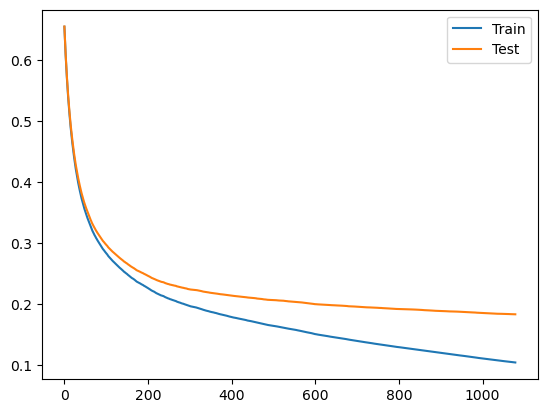

In [45]:
plt.plot(out['train-logloss-mean'],label='Train')
plt.plot(out['test-logloss-mean'],label='Test')
plt.legend()
plt.show()

In [46]:
xgbModel = xgb.train(params=params,
                     dtrain=dTrain,
                     num_boost_round=num_round,
                     verbose_eval=True,
                     early_stopping_rounds=5,
                     evals=evalList)

[0]	test-logloss:0.65472	train-logloss:0.65532
[1]	test-logloss:0.63787	train-logloss:0.63813
[2]	test-logloss:0.62253	train-logloss:0.62251
[3]	test-logloss:0.60824	train-logloss:0.60793
[4]	test-logloss:0.59504	train-logloss:0.59464
[5]	test-logloss:0.58326	train-logloss:0.58275
[6]	test-logloss:0.57149	train-logloss:0.57070
[7]	test-logloss:0.56112	train-logloss:0.56025
[8]	test-logloss:0.55079	train-logloss:0.54969
[9]	test-logloss:0.54134	train-logloss:0.53998
[10]	test-logloss:0.53194	train-logloss:0.53040
[11]	test-logloss:0.52322	train-logloss:0.52146
[12]	test-logloss:0.51510	train-logloss:0.51326
[13]	test-logloss:0.50717	train-logloss:0.50504
[14]	test-logloss:0.50019	train-logloss:0.49790
[15]	test-logloss:0.49301	train-logloss:0.49056
[16]	test-logloss:0.48676	train-logloss:0.48413
[17]	test-logloss:0.48024	train-logloss:0.47739
[18]	test-logloss:0.47427	train-logloss:0.47118
[19]	test-logloss:0.46866	train-logloss:0.46545
[20]	test-logloss:0.46266	train-logloss:0.45930
[2

In [47]:
xgProb = xgbModel.predict(dTest)
print(xgProb)

[0.00376397 0.80051434 0.0106847  ... 0.19851784 0.9783045  0.3238382 ]


In [48]:
print(find_cost(xgProb))

Threshold: 0.0
Total Money Lost: 3842000
Threshold: 0.01
Total Money Lost: 2320600
Threshold: 0.02
Total Money Lost: 1872600
Threshold: 0.03
Total Money Lost: 1615800
Threshold: 0.04
Total Money Lost: 1438700
Threshold: 0.05
Total Money Lost: 1304300
Threshold: 0.06
Total Money Lost: 1208300
Threshold: 0.07
Total Money Lost: 1123700
Threshold: 0.08
Total Money Lost: 1057500
Threshold: 0.09
Total Money Lost: 994300
Threshold: 0.1
Total Money Lost: 945200
Threshold: 0.11
Total Money Lost: 902900
Threshold: 0.12
Total Money Lost: 865700
Threshold: 0.13
Total Money Lost: 836200
Threshold: 0.14
Total Money Lost: 808200
Threshold: 0.15
Total Money Lost: 781200
Threshold: 0.16
Total Money Lost: 761000
Threshold: 0.17
Total Money Lost: 739500
Threshold: 0.18
Total Money Lost: 715800
Threshold: 0.19
Total Money Lost: 700100
Threshold: 0.2
Total Money Lost: 688100
Threshold: 0.21
Total Money Lost: 682100
Threshold: 0.22
Total Money Lost: 671700
Threshold: 0.23
Total Money Lost: 662600
Threshold:

# Neural Net
### Cost: 360,600

In [50]:
print(X_train.shape)

(128000, 70)


In [51]:
X_train_NN, X_val_NN, y_train_NN, y_val_NN = train_test_split(X_train,
                                                              y_train,
                                                              test_size=0.1)

In [52]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5)

nnModel = tf.keras.Sequential()
nnModel.add(tf.keras.Input(shape=(70,)))
nnModel.add(layers.Dense(128,activation='relu'))
nnModel.add(layers.Dense(128,activation='relu'))
nnModel.add(layers.Dropout(0.3))
nnModel.add(layers.Dense(64,activation='relu'))
nnModel.add(layers.Dense(64,activation='relu'))
nnModel.add(layers.Dropout(0.3))
nnModel.add(layers.Dense(1,activation='sigmoid'))

2023-11-15 10:29:27.885462: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [53]:
nnModel.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='binary_crossentropy',
                metrics=['accuracy'])
history = nnModel.fit(X_train_NN,
                      y_train_NN,
                      epochs=1000,
                      batch_size=32,
                      callbacks=[callback],
                      validation_data=[X_val_NN,y_val_NN])

Epoch 1/1000
3600/3600 [==============================] - 5s 1ms/step - loss: 0.3218 - accuracy: 0.8620 - val_loss: 0.2142 - val_accuracy: 0.9140
Epoch 2/1000
3600/3600 [==============================] - 4s 1ms/step - loss: 0.2004 - accuracy: 0.9244 - val_loss: 0.1676 - val_accuracy: 0.9366
Epoch 3/1000
3600/3600 [==============================] - 4s 1ms/step - loss: 0.1677 - accuracy: 0.9389 - val_loss: 0.1526 - val_accuracy: 0.9441
Epoch 4/1000
3600/3600 [==============================] - 4s 1ms/step - loss: 0.1530 - accuracy: 0.9456 - val_loss: 0.1481 - val_accuracy: 0.9450
Epoch 5/1000
3600/3600 [==============================] - 4s 1ms/step - loss: 0.1419 - accuracy: 0.9509 - val_loss: 0.1348 - val_accuracy: 0.9526
Epoch 6/1000
3600/3600 [==============================] - 4s 1ms/step - loss: 0.1315 - accuracy: 0.9558 - val_loss: 0.1334 - val_accuracy: 0.9538
Epoch 7/1000
3600/3600 [==============================] - 4s 1ms/step - loss: 0.1264 - accuracy: 0.9574 - val_loss: 0.1297 -

In [54]:
print(nnModel.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9088      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 6

In [56]:
loss, acc = nnModel.evaluate(X_test,y_test)
print(acc)

1000/1000 [==============================] - 1s 558us/step - loss: 0.1070 - accuracy: 0.9653
0.9652500152587891


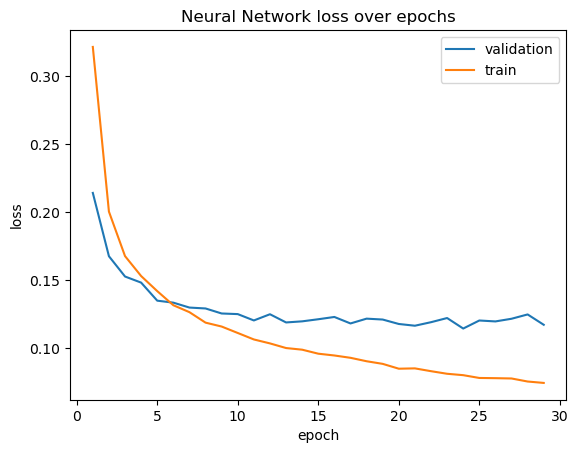

In [57]:
plt.plot(np.linspace(1,29,29),history.history['val_loss'],label='validation')
plt.plot(np.linspace(1,29,29),history.history['loss'],label='train')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Neural Network loss over epochs')
plt.legend()
plt.show()

In [58]:
nnProb = nnModel.predict(X_test)

1000/1000 [==============================] - 1s 567us/step


In [59]:
find_cost(nnProb)

Threshold: 0.0
Total Money Lost: 3842000
Threshold: 0.01
Total Money Lost: 2057100
Threshold: 0.02
Total Money Lost: 1221400
Threshold: 0.03
Total Money Lost: 821000
Threshold: 0.04
Total Money Lost: 619400
Threshold: 0.05
Total Money Lost: 513000
Threshold: 0.06
Total Money Lost: 458600
Threshold: 0.07
Total Money Lost: 429600
Threshold: 0.08
Total Money Lost: 409300
Threshold: 0.09
Total Money Lost: 393500
Threshold: 0.1
Total Money Lost: 386700
Threshold: 0.11
Total Money Lost: 376400
Threshold: 0.12
Total Money Lost: 370700
Threshold: 0.13
Total Money Lost: 370200
Threshold: 0.14
Total Money Lost: 367800
Threshold: 0.15
Total Money Lost: 366400
Threshold: 0.16
Total Money Lost: 364700
Threshold: 0.17
Total Money Lost: 363400
Threshold: 0.18
Total Money Lost: 362400
Threshold: 0.19
Total Money Lost: 362300
Threshold: 0.2
Total Money Lost: 363100
Threshold: 0.21
Total Money Lost: 361600
Threshold: 0.22
Total Money Lost: 362300
Threshold: 0.23
Total Money Lost: 364300
Threshold: 0.24


(360600,
 0.28,
 array([[18437,   773],
        [  412, 12378]]))